In [1]:
#kernel = .venv

import time
from time import time
t0=time()

import pandas as pd 
import numpy as np
from tensorflow.keras import layers,models,callbacks,Sequential #should I remove?
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

t1=time()
print('time to load libraries=',round(t1-t0,1),'s')

time to load libraries= 4.2 s


In [2]:
t1=time()

#create synthetic data
N_train=7500000
N_test =2500000

N_train=7500000
N_test =2500000

#number of attributes
#nx_=7
nx_=1 #25 minutes for the entire notebook

x_train=np.random.rand(N_train,nx_) #train & test data are separately generated
y_train=np.zeros(N_train)
x_test=np.random.rand(N_test,nx_)
y_test=np.zeros(N_test)


#with vectorization
def myfunc7(x):
    y=np.zeros(len(x))
    for i in range(7+1):
        y=y+np.power(x[:,0]*4,i)
    #a sort of step function
    y=np.where(y>=1600,1600,np.where(y>=1200,1200,np.where(y>=800,800,np.where(y>=400,400,y))))/1600
    #create multiplication & division of other columns
    y=y+x[:,1]+np.power(x[:,2],2)+x[:,3]*x[:,4]+x[:,5]/(1+x[:,6])
    return y

#with vectorization
def myfunc1(x):
    y=np.zeros(len(x))
    for i in range(7+1):
        y=y+np.power(x[:,0]*4,i)
    y=np.where(y>=1600,1600,np.where(y>=1200,1200,np.where(y>=800,800,np.where(y>=400,400,y))))/1600
    return y



#vfunc = np.vectorize(myfunc) #it actually hurts the performance

if nx_==7:
    y_train=myfunc7(x_train)
    y_test=myfunc7(x_test)
elif nx_==1:
    y_train=myfunc1(x_train)
    y_test=myfunc1(x_test)

ymax=max(y_train)

y_train=y_train/ymax #a very simple normalization
y_test=y_test/ymax

t2=time(); print('time to generate synthetic data=',round(t2-t1,1),'s'); t1=t2 

time to generate synthetic data= 5.7 s


In [3]:
###############tensorflow fully connected (dense) regression
if 'model' in globals():
    del model

epoch_=50;
batch_size_=5000 #bigger batch sizes are not good

wid_=18;		dep_=28;		activation_='relu';			#MSE*1e4= 0.782 , time= 18:30

model = Sequential()
model.add(Dense(wid_, activation=activation_, kernel_initializer='he_normal', input_shape=(nx_,)))
for i in range(dep_-1):
    model.add(Dense(wid_, activation=activation_, kernel_initializer='he_normal'))
model.add(Dense(1)) #linear activation function

model.compile(optimizer='adam', loss='mse', metrics=['mse']) # compile the model

In [4]:
t1=time()

# fit the model
model.fit(x_train, y_train, epochs=epoch_, batch_size=batch_size_, verbose=2, validation_split=0.1,
          callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=2, mode='auto')])

t2=time(); tt=t2-t1; tminute=tt//60; tsec=tt-tminute*60; print('\r\ntime to train= ',int(tminute),':',int(tsec),sep=''); t1=t2

Epoch 1/50
1350/1350 - 30s - loss: 0.0023 - mse: 0.0023 - val_loss: 5.8414e-04 - val_mse: 5.8414e-04
Epoch 2/50
1350/1350 - 29s - loss: 6.3145e-04 - mse: 6.3145e-04 - val_loss: 5.6043e-04 - val_mse: 5.6043e-04
Epoch 3/50
1350/1350 - 29s - loss: 6.0060e-04 - mse: 6.0060e-04 - val_loss: 5.3545e-04 - val_mse: 5.3545e-04
Epoch 4/50
1350/1350 - 29s - loss: 5.4273e-04 - mse: 5.4273e-04 - val_loss: 5.0182e-04 - val_mse: 5.0182e-04
Epoch 5/50
1350/1350 - 28s - loss: 4.7695e-04 - mse: 4.7695e-04 - val_loss: 7.9196e-04 - val_mse: 7.9196e-04
Epoch 6/50
1350/1350 - 30s - loss: 4.4205e-04 - mse: 4.4205e-04 - val_loss: 8.9912e-04 - val_mse: 8.9912e-04
Epoch 7/50
1350/1350 - 31s - loss: 3.8446e-04 - mse: 3.8446e-04 - val_loss: 2.4365e-04 - val_mse: 2.4365e-04
Epoch 8/50
1350/1350 - 29s - loss: 3.0927e-04 - mse: 3.0927e-04 - val_loss: 1.4325e-04 - val_mse: 1.4325e-04
Epoch 9/50
1350/1350 - 30s - loss: 2.7949e-04 - mse: 2.7949e-04 - val_loss: 2.2325e-04 - val_mse: 2.2325e-04
Epoch 10/50
1350/1350 - 30s

In [5]:
t1=time()

# evaluate the model
error = model.evaluate(x_train, y_train, verbose=1, batch_size=min(1000000,len(x_train)))

# make a prediction
y_test_hat = model.predict(x_test, batch_size=min(1000000,len(x_train)))

mse = mean_squared_error(y_test,y_test_hat)
print('#MSE * 1e4 = ', round(mse*1e4,3))

t2=time(); print('\r\ntime for prediction (inference)=',round(t2-t1,1),'s'); t1=t2

8/8 [==============================] - 5s 672ms/step - loss: 7.9773e-05 - mse: 7.9773e-05
#MSE * 1e4 =  0.796

time for prediction (inference)= 9.1 s



time for prediction (inference)= 1.0 s


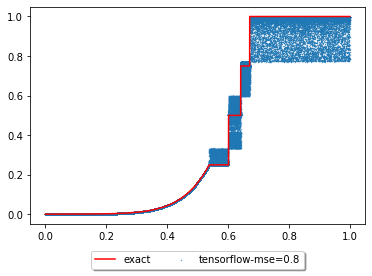

In [6]:
t1=time()
#plotting the results
ind_test=np.argsort(y_test)

plt.plot(np.arange(len(y_test))/len(y_test),y_test[ind_test], label='exact',zorder=2,color='red')

plt.scatter(np.arange(len(y_test))/len(y_test),y_test_hat[ind_test], 
            label='tensorflow-mse='+str(round(mse*1e4,2)),marker='o',s=0.1,zorder=1)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
t2=time(); print('\r\ntime for prediction (inference)=',round(t2-t1,1),'s'); t1=t2

In [7]:
t1=time()
#calculate outputs using coef_
coef_=model.get_weights()

#calculate outputs using
temp_=x_test
for i in range(dep_+1):
    temp_=np.matmul(temp_,coef_[2*i])+coef_[2*i+1]
    if i<dep_: #output layer has identity activation function
        temp_[temp_<0] =0 #fancy index implementation of RelU function 

print('max difference with prediction of keras=',
      max(abs(y_test_hat-temp_))) #difference between outputs calculated by keras & matmul
t2=time(); print('\r\ntime for prediction (inference)=',round(t2-t1,1),'s'); t1=t2

max difference with prediction of keras= [0.00011524]

time for prediction (inference)= 25.9 s


In [8]:
#I don't know why there is a difference, although it's not a very big one

In [9]:
t1=time()
#printing coefficients to file 
file_name_weights_="NN_synthetic_7feature_"


#save coefficients to file
#format:
#0    1   2 3 4
#value,wb,i,j,k
#value=value of weight or bias
#wb=0 for weight, 1 for bias
#i = layer number
#j = node number in layer i
#k = node number in layer i+1
file = open(file_name_weights_+"weights.csv", "w") 
file.write("value,b1w0_,i_,j_,k_\n")

for i in range(dep_+1):
    temp_=model.layers[i].get_weights()[0]
    Nj=len(temp_)
    Nk=len(temp_[0])
    for j in range(Nj):
        for k in range(Nk):
            file.write(str(temp_[j][k])+",0,"+str(i)+","+str(j)+","+str(k)+"\n")
    temp_=model.layers[i].get_weights()[1]
    Nk=len(temp_)
    for k in range(Nk):
        file.write(str(temp_[k])+",1,"+str(i)+",0,"+str(k)+"\n")
file.close()
del temp_,i,j,k,Nj,Nk


#save architecture to file
#format: 
#i,Nj,Nk
#i=layer number, 
#Nj=number of nodes in layer i
#Nk=number of nodes in layer i+1
file = open(file_name_weights_+"dense_layers.csv", "w") 
file.write("i,Nj,Nk\n")

for i in range(dep_+1):
    temp_=model.layers[i].get_weights()[0]
    Nj=len(temp_)
    Nk=len(temp_[0])
    file.write(str(i)+","+str(Nj)+","+str(Nk)+"\n")
file.close()
del temp_,i,Nj,Nk

t2=time(); print('\r\ntime for prediction (inference)=',round(t2-t1,1),'s'); t1=t2


time for prediction (inference)= 0.1 s


In [10]:
t1=time()
#read coefficients from file to variable 'coefs_'

architecture_ = np.array(pd.read_csv(file_name_weights_+"dense_layers.csv") )
coefs_flat_=np.array(pd.read_csv(file_name_weights_+"weights.csv") )
Ni=len(architecture_)

#coefs_=[[np.zeros((architecture_[i,1],architecture_[i,2])),np.zeros(architecture_[i,2]) ] for i in range(Ni)]
coefs_=[[] for i in range(Ni*2)]
for i in range(Ni):
    coefs_[2*i]=np.zeros((architecture_[i,1],architecture_[i,2]))
    coefs_[2*i+1]=np.zeros(architecture_[i,2])
#


for ii in range(len(coefs_flat_)):
    i=int(coefs_flat_[ii,2])
    j=int(coefs_flat_[ii,3])
    k=int(coefs_flat_[ii,4])
    wb=int(coefs_flat_[ii,1])
    val_=coefs_flat_[ii,0]
    if wb==0:
        coefs_[2*i][j,k]=val_
    if wb==1:
        coefs_[2*i+1][k]=val_

t2=time(); print('\r\ntime for prediction (inference)=',round(t2-t1,1),'s'); t1=t2


time for prediction (inference)= 0.1 s


In [11]:
t1=time()
#calculate outputs using coefs_
temp_=x_test
for i in range(dep_+1):
    temp_=np.matmul(temp_,coefs_[2*i])+coefs_[2*i+1]
    if i<dep_: #output layer has identity activation function
        temp_[temp_<0] =0 #fancy index implementation of RelU function 

print('max difference with prediction of keras=',
      max(abs(y_test_hat-temp_))) #difference between outputs calculated by keras & matmul

t2=time(); print('\r\ntime for prediction (inference)=',round(t2-t1,1),'s'); t1=t2

max difference with prediction of keras= [9.10604018e-05]

time for prediction (inference)= 25.3 s


In [12]:
#the read-write files does work with 1 input 